In [1]:
# %load_ext autoreload
# %autoreload 2

import os

os.chdir("..")

import torch
import wandb
import torchvision
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from src.utils.download import download_models
from src.utils.uap_helper import generate_adversarial_images_from_model_dataset, get_datamodule
from src.utils.metrics import metrics, Metrics
from src.data.mri import MRIDataModule
from src.data.covidx import COVIDXDataModule
from src.utils.evaluation import WeightsandBiasEval
from src.models.imageclassifier import ImageClassifier

In [2]:
ENTITY = "24FS_I4DS27"
PROJECT = "baselines"
NUM_WORKERS = 0

BATCH_SIZE = 1  # DO NOT CHANGE
OUTPUT_SIZE = 1  # DO NOT CHANGE

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
    ]
)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

In [3]:
# Download models if not present
models = download_models(ENTITY, PROJECT)

In [25]:
for model in tqdm(models, desc="Model", position=0, total=len(models)):
    modelname, dataset = model.split("-")
    print(f"\n---\nModel: {modelname} - Dataset: {dataset}")

    perturbations = generate_adversarial_images_from_model_dataset(
        modelname,
        dataset,
        num_universal_pertubation_images=1,
        num_pertubation_images=10,
        desired_fooling_rate=1,
        norm_p=2,
        norm_alpha=0.00001,
        max_iter_image=20,
        seed=42,
        eps=1e-6,
        verbose=True,
        device=device,
    )

    break

Model:   0%|          | 0/22 [00:00<?, ?it/s]


---
Model: efficientnet_v2_l - Dataset: covidx_data


Universal Pertubation:   0%|          | 0/1 [00:00<?, ?it/s]

Starting epoch 1...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Loss: 8.168862342834473, Norm: 0.0, InvBCE: 8.168862342834473
Loss: 6.573144435882568, Norm: 0.0003871153458021581, InvBCE: 6.572757244110107
Loss: 5.1448893547058105, Norm: 0.0007587328436784446, InvBCE: 5.144130706787109
Loss: 3.9256417751312256, Norm: 0.0011199809378013015, InvBCE: 3.9245216846466064
Loss: 2.9355862140655518, Norm: 0.0014689506497234106, InvBCE: 2.934117317199707
Loss: 2.1747634410858154, Norm: 0.0018035381799563766, InvBCE: 2.172959804534912
Loss: 1.623170256614685, Norm: 0.002121665747836232, InvBCE: 1.6210485696792603
Loss: 1.2415130138397217, Norm: 0.002421632641926408, InvBCE: 1.239091396331787
Loss: 0.985498309135437, Norm: 0.0027024217415601015, InvBCE: 0.9827958941459656
Loss: 0.815651535987854, Norm: 0.002963785547763109, InvBCE: 0.8126877546310425
Loss: 0.7019845843315125, Norm: 0.003206125693395734, InvBCE: 0.6987784504890442
Loss: 0.6242859363555908, Norm: 0.0034302815329283476, InvBCE: 0.6208556294441223
Loss: 0.5696697235107422, Norm: 0.0036

Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 0.8
Starting epoch 2...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Image fooled! Adding perturbation...
Image 1...
Image fooled! Adding perturbation...
Image 2...
Image fooled! Adding perturbation...
Image 3...
Loss: 0.7208948135375977, Norm: 0.0, InvBCE: 0.7134740948677063
Loss: 0.566939651966095, Norm: 0.0003797436074819416, InvBCE: 0.5593951940536499
Loss: 0.46147459745407104, Norm: 0.0007406285149045289, InvBCE: 0.45379629731178284
Image fooled! Adding perturbation...
Image 4...
Image fooled! Adding perturbation...
Image 5...
Image fooled! Adding perturbation...
Image 6...
Loss: 2.4307215213775635, Norm: 0.0, InvBCE: 2.4229042530059814
Loss: 2.209423780441284, Norm: 0.00037397517007775605, InvBCE: 2.2015202045440674
Loss: 1.969642996788025, Norm: 0.0007443771464750171, InvBCE: 1.961638331413269
Loss: 1.7245535850524902, Norm: 0.0011122761061415076, InvBCE: 1.7164345979690552
Loss: 1.4934114217758179, Norm: 0.0014774503652006388, InvBCE: 1.485166311264038
Loss: 1.2953182458877563, Norm: 0.0018383546266704798, InvBCE: 1.2869373559951782
I

Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 0.8
Starting epoch 3...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Image fooled! Adding perturbation...
Image 1...
Image fooled! Adding perturbation...
Image 2...
Image fooled! Adding perturbation...
Image 3...
Loss: 0.5944512486457825, Norm: 0.0, InvBCE: 0.5856274366378784
Loss: 0.4793444573879242, Norm: 0.0003775047662202269, InvBCE: 0.4703884720802307
Image fooled! Adding perturbation...
Image 4...
Image fooled! Adding perturbation...
Image 5...
Image fooled! Adding perturbation...
Image 6...
Loss: 1.6837643384933472, Norm: 0.0, InvBCE: 1.6746708154678345
Loss: 1.4598461389541626, Norm: 0.000373407470760867, InvBCE: 1.4506419897079468
Loss: 1.2688125371932983, Norm: 0.0007411565165966749, InvBCE: 1.2594882249832153
Image fooled! Adding perturbation...
Image 7...
Loss: 0.8674425482749939, Norm: 0.0, InvBCE: 0.8579916954040527
Image fooled! Adding perturbation...
Image 8...
Image fooled! Adding perturbation...
Image 9...
Loss: 0.7894054651260376, Norm: 0.0, InvBCE: 0.7798653841018677
Image fooled! Adding perturbation...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 0.7
Starting epoch 4...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Image fooled! Adding perturbation...
Image 1...
Loss: 0.6528841257095337, Norm: 0.0, InvBCE: 0.6432766914367676
Image fooled! Adding perturbation...
Image 2...
Image fooled! Adding perturbation...
Image 3...
Loss: 0.4863429069519043, Norm: 0.0, InvBCE: 0.4766613245010376
Image fooled! Adding perturbation...
Image 4...
Image fooled! Adding perturbation...
Image 5...
Image fooled! Adding perturbation...
Image 6...
Loss: 1.4543596506118774, Norm: 0.0, InvBCE: 1.4445445537567139
Loss: 1.2657876014709473, Norm: 0.0003727869188878685, InvBCE: 1.255858302116394
Image fooled! Adding perturbation...
Image 7...
Image fooled! Adding perturbation...
Image 8...
Image fooled! Adding perturbation...
Image 9...
Image fooled! Adding perturbation...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 0.8
Starting epoch 5...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Loss: 0.5666967034339905, Norm: 0.0, InvBCE: 0.556646466255188
Image fooled! Adding perturbation...
Image 1...
Image fooled! Adding perturbation...
Image 2...
Image fooled! Adding perturbation...
Image 3...
Loss: 0.4881090819835663, Norm: 0.0, InvBCE: 0.4779989421367645
Image fooled! Adding perturbation...
Image 4...
Image fooled! Adding perturbation...
Image 5...
Image fooled! Adding perturbation...
Image 6...
Loss: 1.2615642547607422, Norm: 0.0, InvBCE: 1.251320719718933
Image fooled! Adding perturbation...
Image 7...
Image fooled! Adding perturbation...
Image 8...
Image fooled! Adding perturbation...
Image 9...
Image fooled! Adding perturbation...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 0.9
Starting epoch 6...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Image 0...
Image fooled! Adding perturbation...
Image 1...
Image fooled! Adding perturbation...
Image 2...
Image fooled! Adding perturbation...
Image 3...
Loss: 0.4444281756877899, Norm: 0.0, InvBCE: 0.4340626895427704
Image fooled! Adding perturbation...
Image 4...
Image fooled! Adding perturbation...
Image 5...
Image fooled! Adding perturbation...
Image 6...
Loss: 1.182368278503418, Norm: 0.0, InvBCE: 1.1718647480010986
Image fooled! Adding perturbation...
Image 7...
Image fooled! Adding perturbation...
Image 8...
Image fooled! Adding perturbation...
Image 9...
Loss: 0.7402416467666626, Norm: 0.0, InvBCE: 0.7296146750450134
Image fooled! Adding perturbation...


Image:   0%|          | 0/10 [00:00<?, ?it/s]

Fooling rate: 1.0


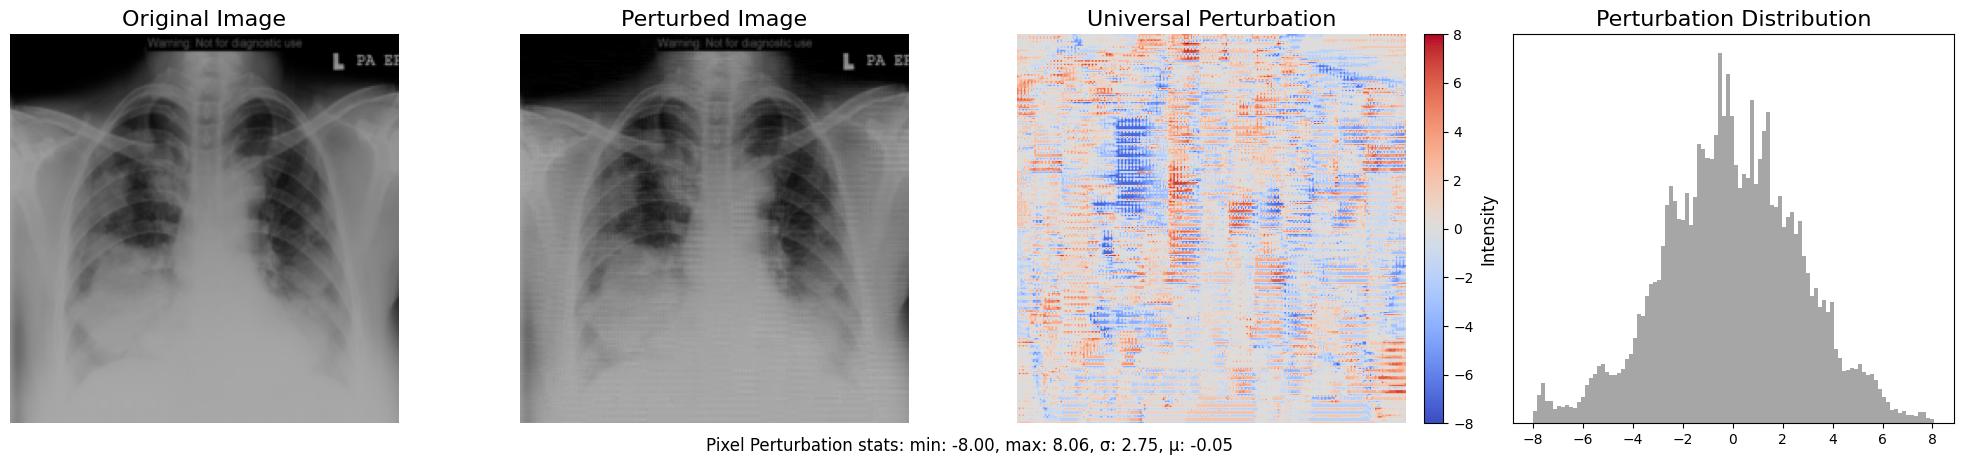

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import torch

v = perturbations[0].detach()
get_datamodule(dataset, seed=42).setup()
image, _ = next(iter(get_datamodule(dataset).train_dataloader()))

# Prepare subplots in one row
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figsize to ensure each subplot is visually proportional

# Original Image
axs[0].imshow(image.cpu().squeeze().permute(1, 2, 0).numpy().astype(int))
axs[0].set_title("Original Image", fontsize=16)
axs[0].axis("off")  # Hide axes for cleaner look

# Perturbed Image
x_adv = image + v.cpu()
x_adv = torch.clamp(x_adv, 0, 255)
axs[1].imshow(x_adv.cpu().squeeze().permute(1, 2, 0).numpy().astype(int))
axs[1].set_title("Perturbed Image", fontsize=16)
axs[1].axis("off")

# Perturbation Visualization
perturbation_visual = v.mean(dim=0).cpu().squeeze().numpy().astype(int)
vmax = abs(perturbation_visual).max()
im = axs[2].imshow(perturbation_visual, cmap="coolwarm", vmin=-vmax, vmax=vmax)
axs[2].set_title("Universal Perturbation", fontsize=16)
axs[2].axis("off")
cbar = plt.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
cbar.set_label("Intensity", fontsize=12)

# Statistical Distribution of Perturbation
axs[3].hist(v.cpu().flatten(), bins=100, color="grey", alpha=0.7)
axs[3].set_aspect("auto", adjustable="box")
axs[3].set_title("Perturbation Distribution", fontsize=16)
axs[3].set_yticks([])
axs[3].axis("on")

plt.suptitle(
    f"Pixel Perturbation stats: min: {v.min().item():.2f}, max: {v.max().item():.2f}, σ: {v.std().item():.2f}, μ: {v.mean().item():.2f}",
    fontsize=12,
    y=0.05,  # Adjust for top layout
)

plt.tight_layout()
plt.show()